In [2]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import csv
import optunity

#Makes the diagrams look nice and shiny
plt.rcParams['figure.figsize']=(7,13)
plt.rcParams['axes.linewidth'] = 2
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=14)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)

params=np.array([-0.819,2.296])
theta = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9, 9/9])

num_pts = 2000#2000   # the number of points to generate
skip = 50    # the number of initial points of the Sobol sequence to skip
# generate Sobol sequence
x_sobol=np.zeros((num_pts, 40))
res = optunity.solvers.Sobol.i4_sobol_generate(40, num_pts, skip)

for i,j in enumerate(zip(*res)):
    x_sobol[:,i]=j
    
percent=0.15

delta_a=params[0]*percent*(1-2*x_sobol[:,0])
delta_b=params[1]*percent*(1-2*x_sobol[:,1])

print(delta_a)

[ 0.08062031 -0.04222969 -0.01151719 ... -0.12273003 -0.12267004
  0.00017996]


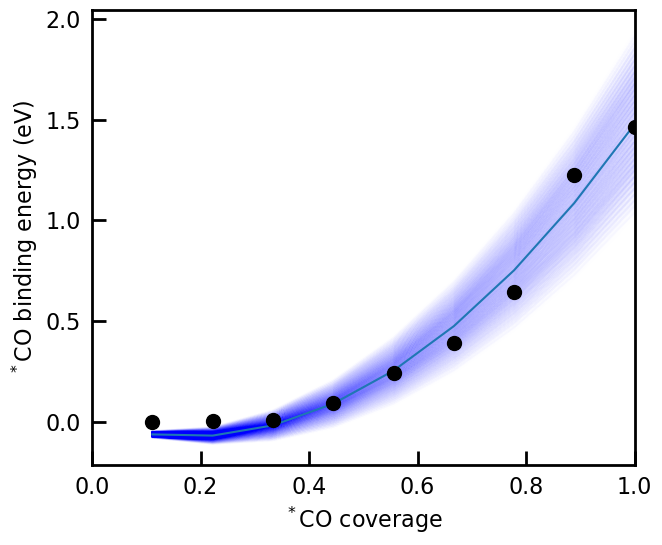

In [3]:
#3rd-order polynomials
def poly(a,b, theta):
    BE = a*theta + b*theta**2
    return BE

gs=gridspec.GridSpec(nrows=2, ncols=1)
gs.update(wspace=0.3, hspace=0.2)

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]

theta_co_111 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9, 9/9])
hcov_co_111=(np.array([-1.587,-1.581,-1.58,-1.495,-1.343,-1.194,-0.9415,-0.3616,-0.1236])--1.587)
scov_co_111=(np.array([0.04041,0.039,0.04057,0.04119,0.03542,0.03041,0.03109,0.02412,0.02142])-0.04041)/96.485

ax0=plt.subplot(gs[0,0])



for i in range(num_pts):
    ax0.plot(theta,poly(params[0]+delta_a[i],params[1]+delta_b[i],theta),color='b',alpha=0.005)

ax0.plot(theta,poly(params[0],params[1],theta))
ax0.plot(theta,hcov_co_111,linestyle='None',marker='o',color='k')
    
ax0.set_ylabel('$\mathrm{^*CO\ binding\ energy\ (eV)}$')
#ax0.set_ylim([-2, -0.8])
ax0.set_xlim([0, 1])
ax0.set_xlabel('$\mathrm{^*CO\ coverage}$')

plt.savefig('CO_211_covdep_sobol.png',dpi=600,transparent=False, bbox_inches='tight')